# Explorations and tests with the heavier data-star

- dst28gm06n052

st28gm06n052_186.sav

st28gm06n052_190.sav

st28gm06n052_198.sav

In [1]:
# Check stellar props
from scipy.io.idl import readsav
import numpy as np
import analyze_co5bold_functions as c5d

teststar = readsav('../co5bold_data/dst28gm06n052/st28gm06n052_186.sav')
teststar = teststar['ful']

# Star's props
print(teststar['PAR'][0][0][2])

#Grid's props
# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
print(teststar['Z'][0][0][4])

# Minimum cellsize:
AUcm = 1.49598e13 # cm
c5dgrid,cellcourners,cellsize = c5d.load_grid_properties(
    savpath='../co5bold_data/dst28gm06n052/st28gm06n052_186.sav'
)

print(f'Minimum cell: {cellsize/AUcm} AU')
print(f'Total size of grid: {(np.max(cellcourners)-np.min(cellcourners))/AUcm} AU')

# '3D dusty AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
# > Teff = 2800K



/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


[b'Parameter file for RHD code:'
 b'3D dusty AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
 b'Start model st28gm06n052_001.sta with 679^3 points'
 b'  based on st28gm06n050_300.end,'
 b'  extended inner and outer grid with rhd_manipulate.pro'
 b'Code version 2020-02-06:  MPI + OpenMP'
 b'Non-interacting forsterite+corundum dust, ar_dustrainabu: 3.0E-16'
 b'Non-grey 3-cluster opacity table:'
 b'  t2800gm050mm00_coma_opal_paola_oc1r_b3_n04.opta'
 b'"Big Box" buffer layer: N_radThinPoint=101+6, radThinHeatScheme=ConstantLum'
 b'Radiation pressure: radThinPressScheme=ConstantLum'
 b'From n034 on: c_radthintfactor=0.75->0.77']
(679, 679, 679)
[[-339  339]
 [-339  339]
 [-339  339]]
Minimum cell: 0.02582559459671921 AU
Total size of grid: 29.79639527908983 AU


In [17]:
# Create grid
import create_r3d_functions as c3d

# Smallest c5d cells are 0.026 AU
# Radius of star: 1.651AU (355 Rsun)
# Settings for the grid
AUcm = 1.49598e13 # cm
r3dedge = 29.796 * AUcm # Size of whole grid
basecell = 0.03*AUcm * 2**4 # Size of base cell (smallest cell is 0.03 AU)
nxyz = r3dedge/basecell
refinementlist_au = [9.5, 5.5, 3.5, 2.5]
refinementlist = [refs*AUcm for refs in refinementlist_au]

c3d.create_grid(
    gridedge=r3dedge/AUcm, 
    nxyz=nxyz, 
    refinementlist=refinementlist_au, 
    inrefine=0.13, 
    savegrid=True
)

# If I didn't have it already, create wavelength-grid here also!

Creating amr_grid with octree refinement.
Final length of total side of whole grid: 29.759999999999998 AU
Number of base cells along one side of the grid: 62
Distances to outer refinement limits from centrum: [9.5, 5.5, 3.5, 2.5] AU
Distances to inner refinement limits from centrum: [0.325, 0.65, 0.9750000000000001, 1.3] AU
Number refinements: 4
Size of base cell: 0.48 AU
Child cell size 1: 0.24 AU
Child cell size 2: 0.12 AU
Child cell size 3: 0.06 AU
Child cell size 4: 0.03 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid:
    amr_grid.inp
     grid_info.txt
    grid_distances.csv
    grid_cellsizes.csv
DONE



In [1]:
# Create onestar-data
# ie the not-binned data which treats the star as one specie

import analyze_co5bold_functions as a5d
import os

path = f'../r3dresults/st28gm06n052/'

for phase in ['186','190','198']:
    print(f'Doing phase: {phase}')
    
    a5d.create_star(
        savpath=f'../co5bold_data/dst28gm06n052/st28gm06n052_{phase}.sav',
        amrpath=path+'amr_grid.inp',
        gridpath=path+'grid_distances.csv',
        sizepath=path+'grid_cellsizes.csv'
    )

    print('Moving files')
    os.system(f'mv ../dust_density_onestar.inp {path}9species_{phase}/dust_density_onestar.inp')
    os.system(f'mv ../dust_temperature_onestar.dat {path}9species_{phase}/dust_temperature_onestar.dat')
    os.system(f'mv ../star_opacities.dat {path}9species_{phase}/star_opacities.dat')

print('All done')


Doing phase: 186
Loading R3D grid
Loading C5D grid properties


/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star:
    dust_density_onestar.inp
    dust_temperature_onestar.dat
    star_opacities.dat
DONE

Moving files
Doing phase: 190
Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star:
    dust_density_onestar.inp
    dust_temperature_onestar.dat
    star_opacities.dat
DONE

Moving files
Doing phase: 198
Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)


KeyboardInterrupt: 

In [ ]:
# Create binned star data
import analyze_co5bold_functions as a5d
import os

nbins = 9
Teff = 2800

path = f'../r3dresults/st28gm06n052/'

for phase in ['186','190','198']:
    print(f'Doing phase: {phase}')

    a5d.create_staropacity(
        pathopacity = f'{path}9species_{phase}/star_opacities.dat',
        pathstardensity=f'{path}9species_{phase}/dust_density_onestar.inp',
        pathwavelength=f'{path}wavelength_micron.inp',
        pathtemperature=f'{path}9species_{phase}/dust_temperature_onestar.dat',
        temperaturelimit=5*Teff,
        nbins=nbins
    )

    print('Moving files')
    os.system(f'mv ../dust_density_starbins.inp {path}9species_{phase}/dust_density.inp')
    os.system(f'mv ../dustkappa_*.inp {path}9species_{phase}/')
    os.system(f'mv ../dustopac_starbins.inp {path}9species_{phase}/dustopac.inp')
    os.system(f'mv ../dust_temperature_starbins.dat {path}9species_{phase}/dust_temperature.dat')
    os.system(f'mv ../star_opacities_bins.dat {path}9species_{phase}/')

print('All done')


## Analyze input data

In [ ]:
# Plot densities as func of radius of all star-species
import analyze_r3d_functions as a3d

a3d.plot_alldensity_radius(
    path='../r3dresults/st28gm06n052/9species_186/'
)

In [ ]:
# Plot temperatures as func of radius of all star-species
import analyze_r3d_functions as a3d

a3d.plot_alltemperature_radius(
    path='../r3dresults/st28gm06n052/9species_186/'
)

In [ ]:
# Plot c5d's kappa in r3d-grid
import analyze_co5bold_functions as a5d

a5d.plot_opakapparadius(
    path='../r3dresults/st28gm06n052/9species_186/'
)


In [ ]:
# Plot all star-kappa as func of wavelength
import analyze_r3d_functions as a3d

a3d.plot_allkappa(
    path='../r3dresults/st28gm06n052/9species_186/'
)

## Analyze images and SED

In [ ]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

path = '../r3dresults/st28gm06n052/9species_186/'

imagewaves = [1,10,1000]
images = [f'image_{imagewave}um.out' for imagewave in imagewaves]

testflux = a3d.plot_images(
    path=path,
    images=images,
    distance=1
)

maxflux,maxwave = a3d.plot_sed(path=f'{path}spectrum.out')

# Print luminosity in Lsols
# Wien's displacement law: freqmax = kb/h*T * 2.821439[..]
print(f"{a3d.compute_luminosity(path=f'{path}spectrum.out')/3.828e26} Lsol")
print(f'Max flux: {maxflux} Jy, at {maxwave} um.')
print(f'BB-temperature: {2.998e8/(5.879e10 * maxwave*1e-6)} K')

plt.plot(imagewaves,testflux,'r*')


# Test final create-stars-script

In [1]:
# With smoothing

import create_r3d_functions as c3d
import analyze_co5bold_functions as a5d
import analyze_r3d_functions as a3d
import os

# Some definitions
AUcm = 1.49598e13 # cm
modelname = 'st28gm06n052'
path = f'../r3dresults/{modelname}/'
phases = [186,190,198]


# Extract c5d grid size and star size in cm
c5dgrid,cellcourners,cellsize = a5d.load_grid_properties(
    savpath = f'../co5bold_data/d{modelname}/{modelname}_{phases[0]}.sav'
)
Mstar,Rstar,Lstar = a5d.load_star_information(
    savpath = f'../co5bold_data/d{modelname}/{modelname}_{phases[0]}.sav'
)


# Create spatial grid

# Settings for the grid
r3dedge = 2 * cellcourners.max() # Size of whole grid
basecell = cellsize*1.001 * 2**4 # Size of base cells (based on smallest cells and 4 refinements, make it slightly larger to be safe)
nxyz = r3dedge/basecell # Number of base cells per size

# Refinements based on stellar radius
refinementlist_au = [
    3.0*Rstar/AUcm,
    2.5*Rstar/AUcm,
    2.0*Rstar/AUcm,
    1.5*Rstar/AUcm
]

# Inner refinements up to 0.9 Rstar
inrefine_au = 0.9*Rstar / (4*refinementlist_au[-1]*AUcm)

# Create grid
c3d.create_grid(
    gridedge = r3dedge/AUcm, 
    nxyz = nxyz, 
    refinementlist = refinementlist_au, 
    inrefine = inrefine_au, 
    savegrid=True
)

# Move grid files to correct folder
os.system(
    f'mv ../amr_grid.inp {path}'
)
os.system(
    f'mv ../grid_info.txt {path}'
)
os.system(
    f'mv ../grid_distances.csv {path}'
)
os.system(
    f'mv ../grid_cellsizes.csv {path}'
)

# Create wavelength grid
wavelengths = c3d.create_wavelength(
    wavelengthstart = 0.1,
    wavelengthend = 1000.0,
    nwave = 100,
    logscale = 'y'
)

# Move wavelengthgrid to data-folder
os.system(
    f'mv ../wavelength_micron.inp {path}'
)

# List for stellar radii per phase
starradii = []

for phase in phases:
    # And copy wavelength-grid to each phase-folder
    os.system(
        f'cp {path}wavelength_micron.inp {path}{phase}/'
    )

    # Extract star's radius for each phase
    Mstar,Rstar,Lstar = a5d.load_star_information(
        savpath = f'../co5bold_data/d{modelname}/{modelname}_{phase}.sav',
        printoutput = 'n'
    )
    starradii.append(Rstar)


# Extract griddistances
griddistances = a3d.load_griddistances(
    gridpath= f'{path}grid_distances.csv',
    amrpath= f'{path}amr_grid.inp'
)[:,0]


# Create all r3d-data from c5d-data
a5d.create_stars(
    modelnames = [modelname],
    phases = phases
)


# Remove negative spikes in opacity and density to correct final luminosity
a5d.smooth_stellardata(
    path = path,
    phases = phases,
    starradii=starradii,
    griddistances=griddistances,
)


# Create radmc3d-run scripts
c3d.write_r3d_runscripts(
    path = path,
    phase_list = phases,
    sed_inclination_list = [0,90,180,270],
    image_wavelength_list = [1,10,100],
    image_inclination_list = [0,90,180,270],
    image_sizeau = r3dedge/AUcm,
    image_npix = 256,
)



print('All done')

/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


Stellar info: '3D dusty AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
Creating amr_grid with octree refinement.
Final length of total side of whole grid: 29.780836060395945 AU
Number of base cells along one side of the grid: 72
Distances to outer refinement limits from centrum: [4.951319536357438, 4.126099613631198, 3.3008796909049587, 2.475659768178719] AU
Distances to inner refinement limits from centrum: [0.3713489652268079, 0.7426979304536158, 1.1140468956804235, 1.4853958609072315] AU
Number refinements: 4
Size of base cell: 0.4136227230610557 AU
Child cell size 1: 0.20681136153052784 AU
Child cell size 2: 0.10340568076526392 AU
Child cell size 3: 0.05170284038263196 AU
Child cell size 4: 0.02585142019131598 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid:
    amr_grid.inp
    grid_info.txt
    

In [1]:
# Manual change run scripts afterwards

import create_r3d_functions as c3d
import analyze_co5bold_functions as a5d

AUcm = 1.49598e13 # cm
modelname = 'st28gm06n052'
path = f'../r3dresults/{modelname}/'
phases = [186,190,198]


c5dgrid,cellcourners,cellsize = a5d.load_grid_properties(
    savpath = f'../co5bold_data/d{modelname}/{modelname}_{phases[0]}.sav'
)

# Settings for the grid
r3dedge = 2 * cellcourners.max() # Size of whole grid

# Create radmc3d-run scripts
c3d.write_r3d_runscripts(
    path = path,
    phase_list = phases,
    sed_inclination_list = [0,90,180,270],
    image_wavelength_list = [1,10,100],
    image_inclination_list = [0,90,180,270],
    image_sizeau = r3dedge/AUcm,
    image_npix = 256,
)


/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


Finished writing run-r3d-scripts:
    r3doutput_[PHASE].txt
    runcommand[PHASE].sh
    runcommand_main.sh



Lum (i = 0 deg): 5206.456654280256
Lum (i = 90 deg): 6487.268386139034
Lum (i = 180 deg): 7847.574604403732
Lum (i = 270 deg): 8308.462940410753
SED-Luminosity 186: 6962.440646308444 Lsol
BB-temperature 186: 2366.981344305215 K
Lum (i = 0 deg): 7179.914508747603
Lum (i = 90 deg): 6659.02673035107
Lum (i = 180 deg): 9186.486740931176
Lum (i = 270 deg): 8698.921673895798
SED-Luminosity 190: 7931.087413481413 Lsol
BB-temperature 190: 2366.981344305215 K
Lum (i = 0 deg): 8125.573297304738
Lum (i = 90 deg): 7001.353763832313
Lum (i = 180 deg): 8265.813187909982
Lum (i = 270 deg): 7905.813865192404
SED-Luminosity 198: 7824.638528559858 Lsol
BB-temperature 198: 2366.981344305215 K


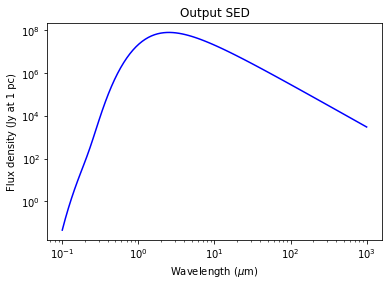

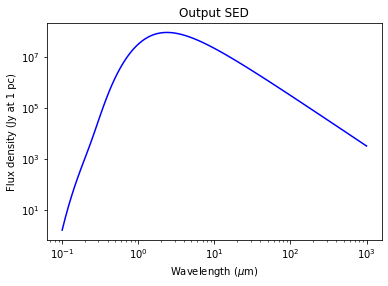

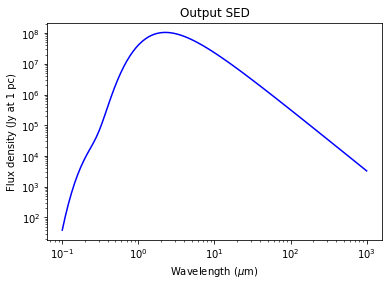

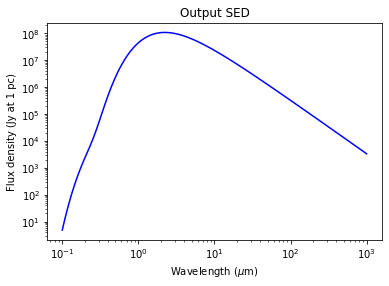

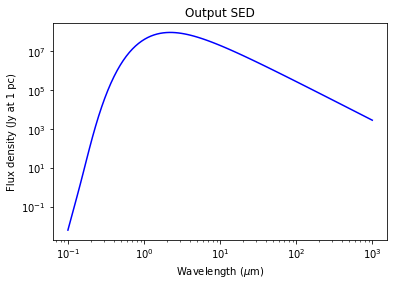

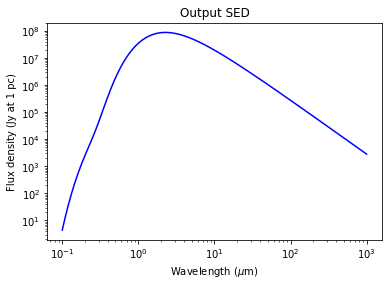

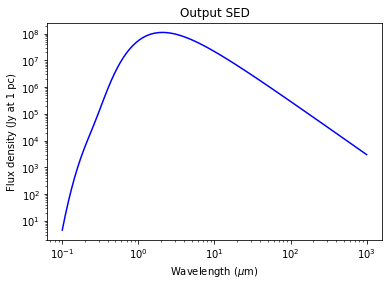

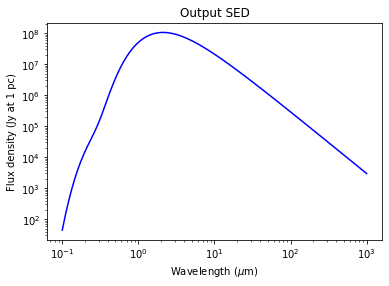

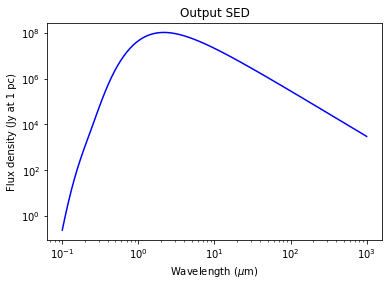

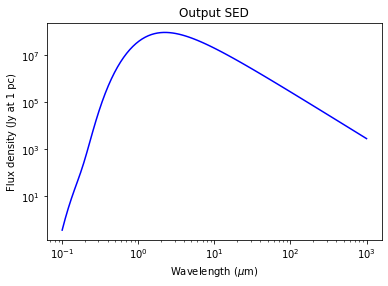

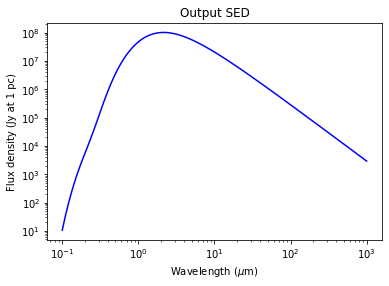

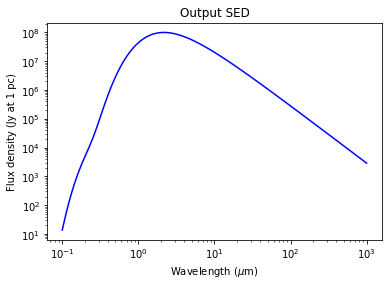

In [3]:
# Plot SEDs

import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

path = '../r3dresults/st28gm06n052/'
phases = [186,190,198]
sedincls = [0,90,180,270]

for phase in phases:

    lumtot = 0

    # Plot SEDs
    for sedincl in sedincls:
        maxflux,maxwave = a3d.plot_sed(
            path=f'{path}{phase}/spectrum_i{sedincl}.out'
        )

        # Compute luminosity
        lum = a3d.compute_sed_luminosity(
            path=f'{path}{phase}/spectrum_i{sedincl}.out'
        )
        lumtot += lum
        print(f'Lum (i = {sedincl} deg): {lum/3.828e26}')

    lumtot /= len(sedincls)*3.828e26

    # Printouts
    print(f"SED-Luminosity {phase}: {lumtot} Lsol")
    print(f'BB-temperature {phase}: {2.998e8/(5.879e10 * maxwave*1e-6)} K')


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1255: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(


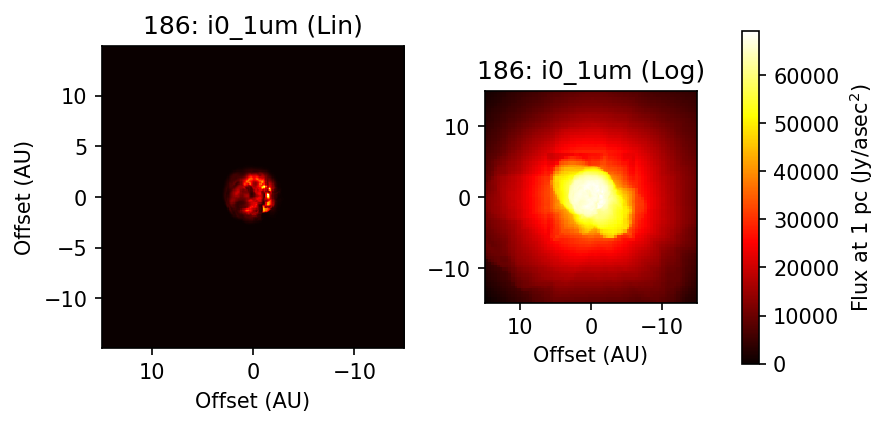

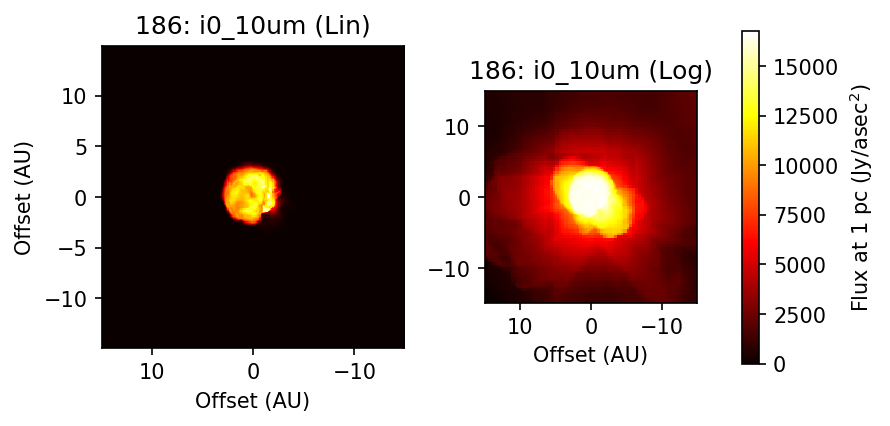

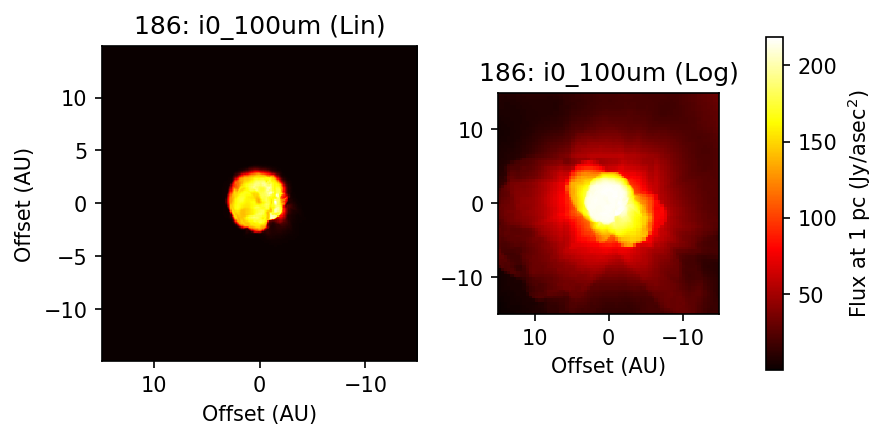

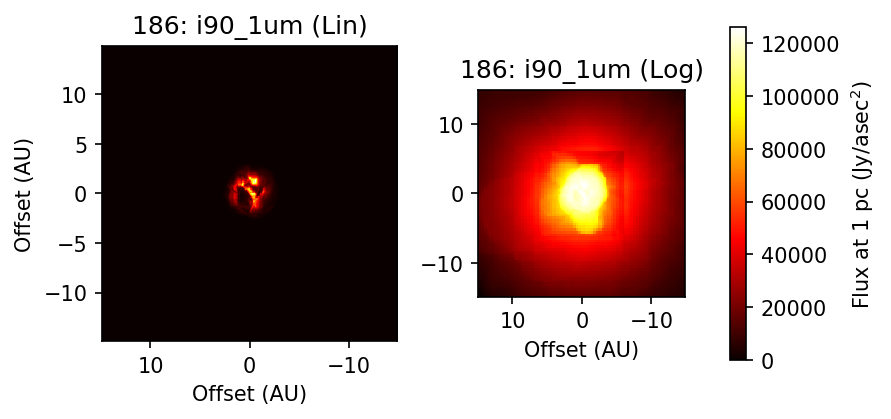

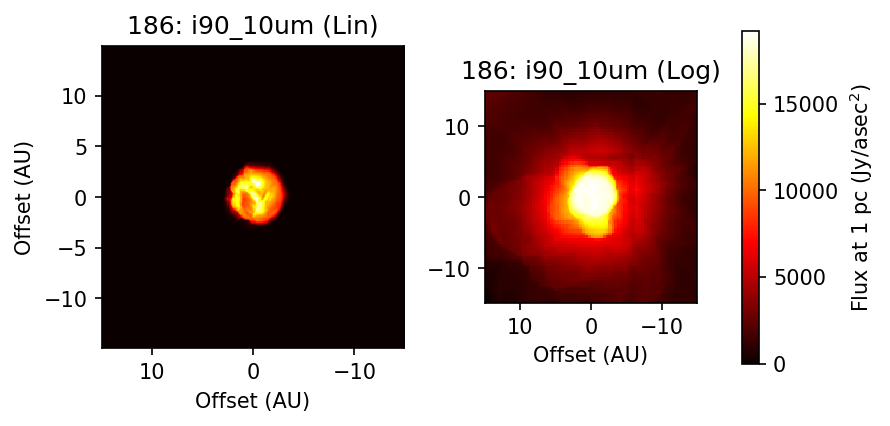

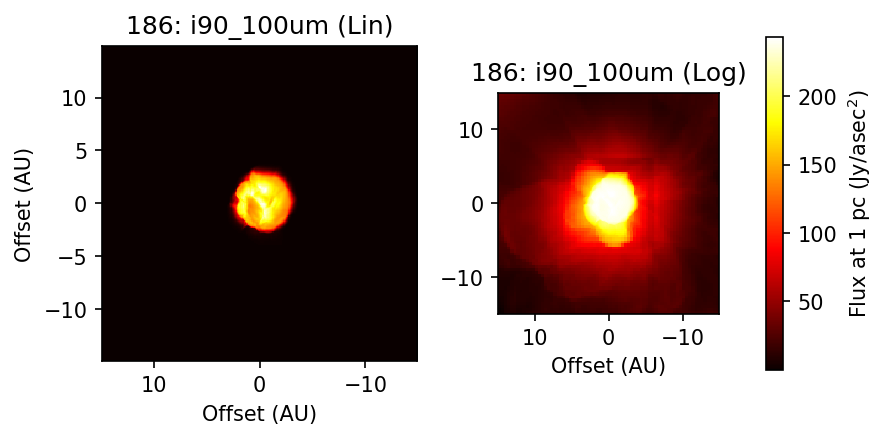

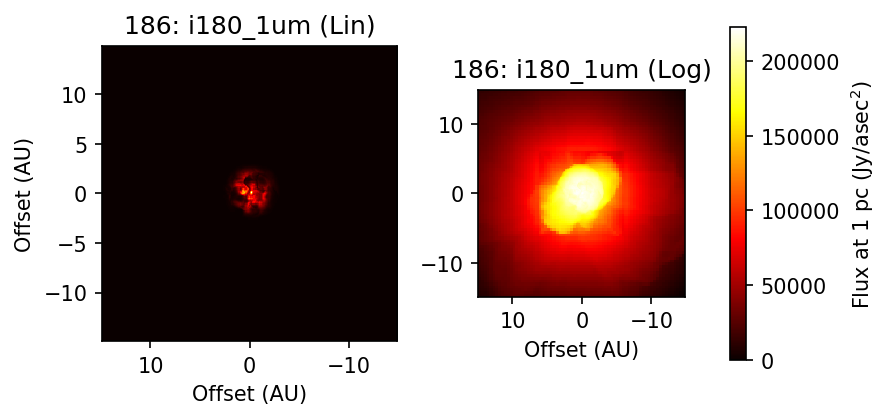

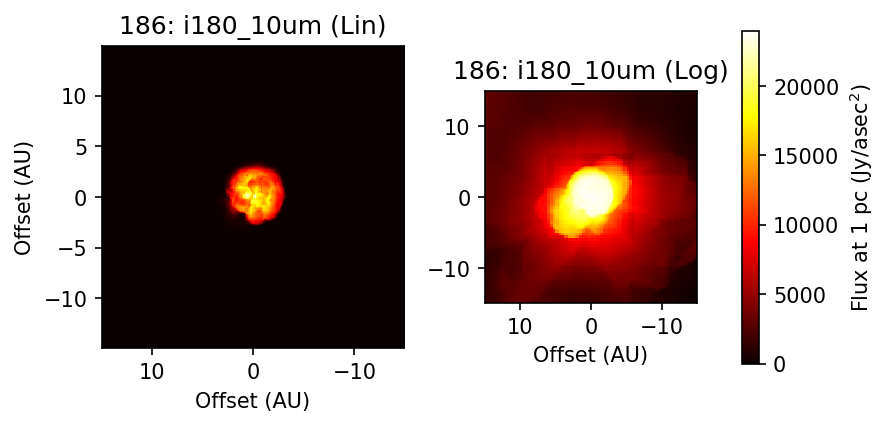

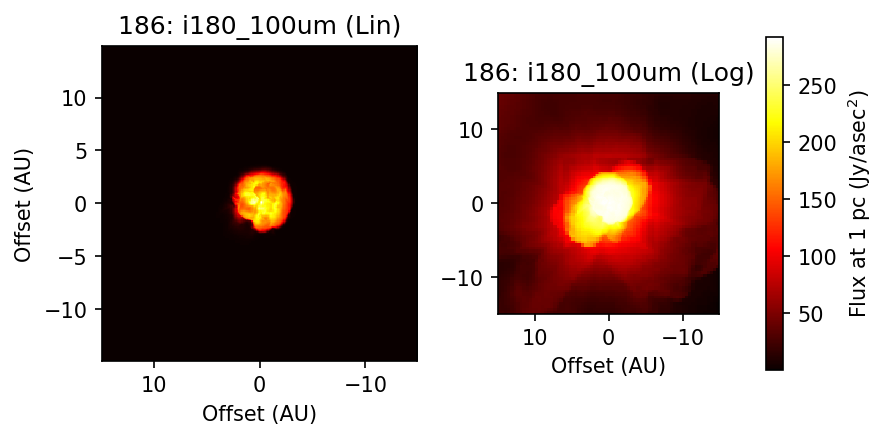

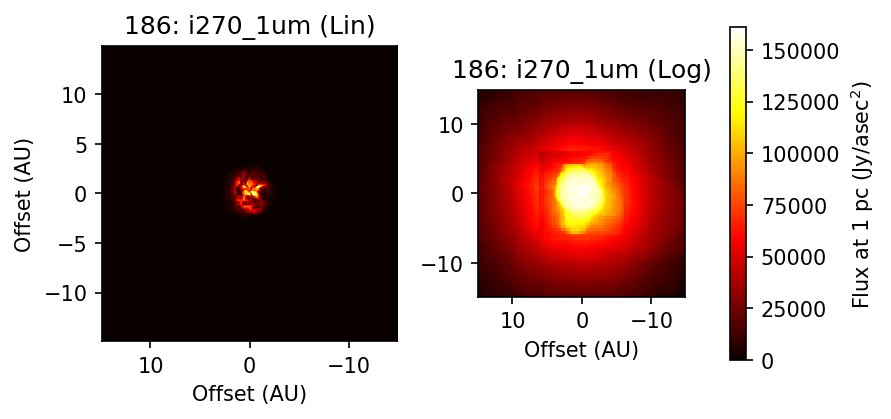

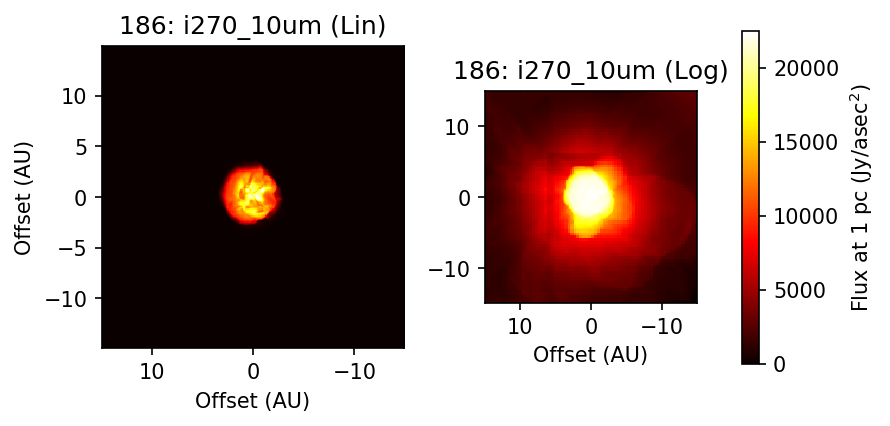

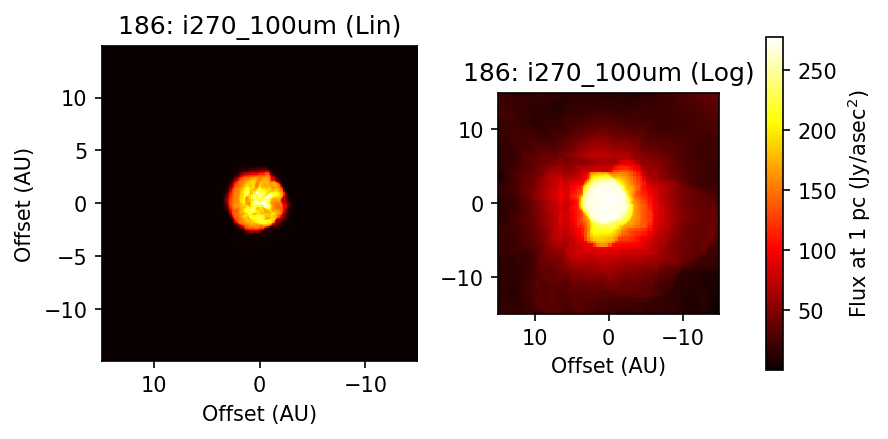

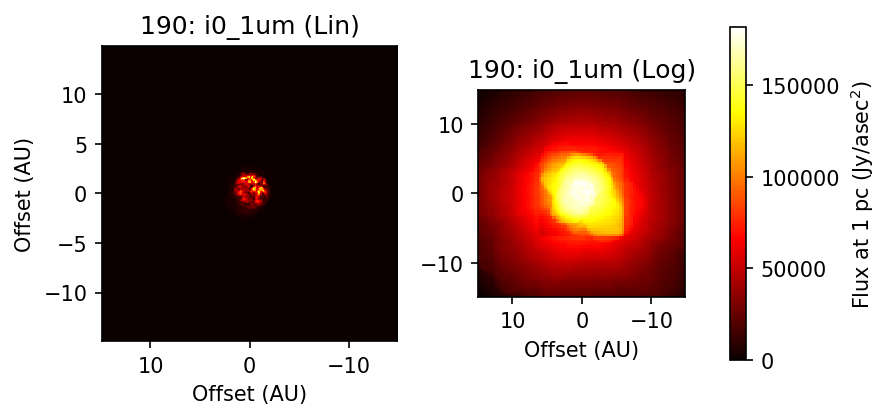

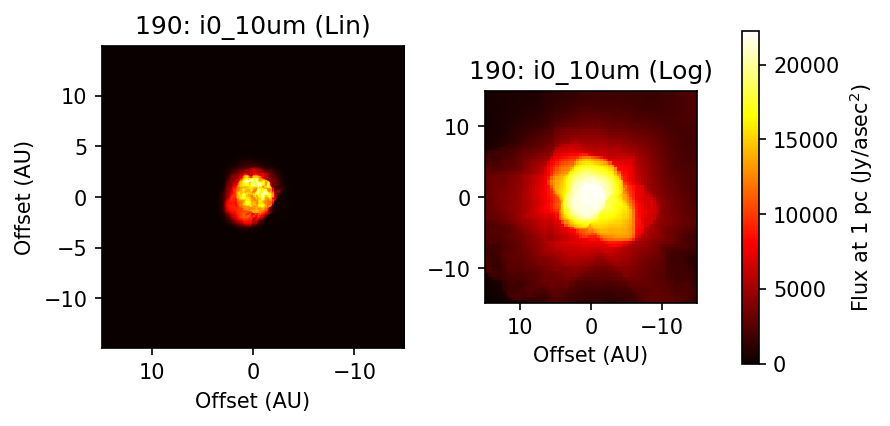

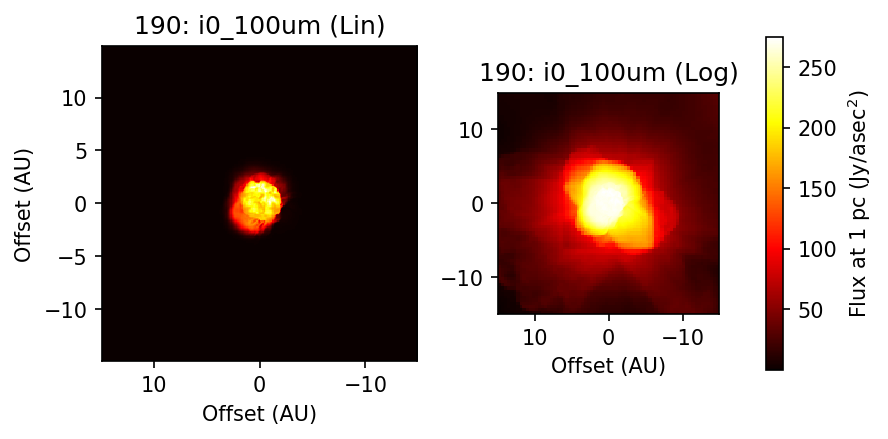

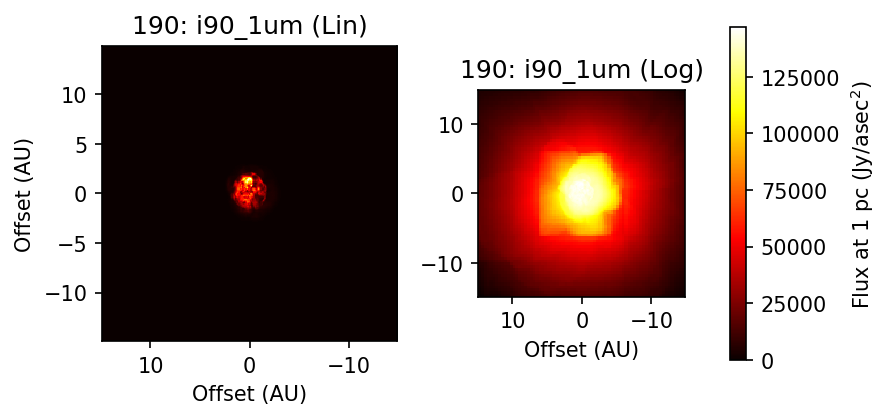

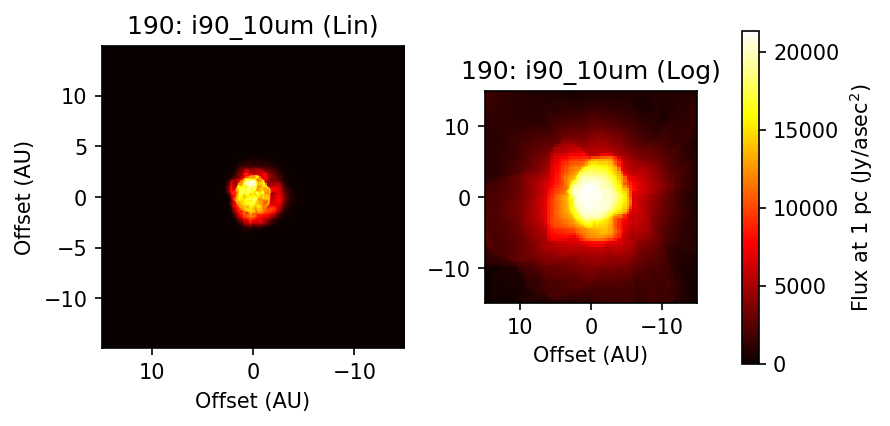

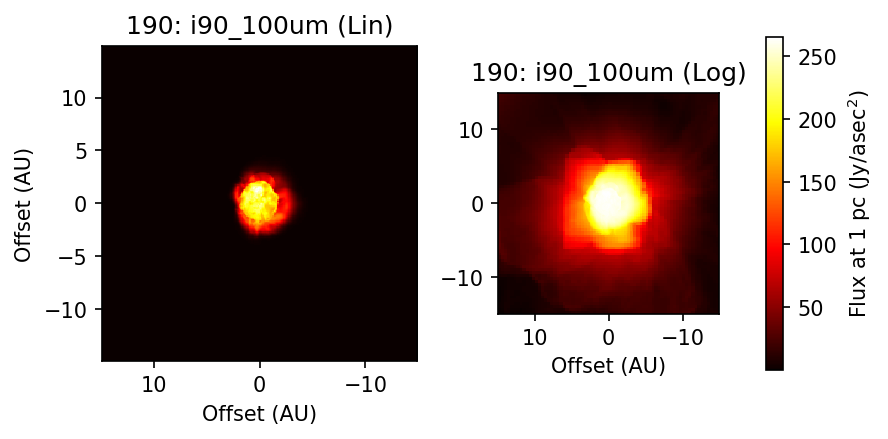

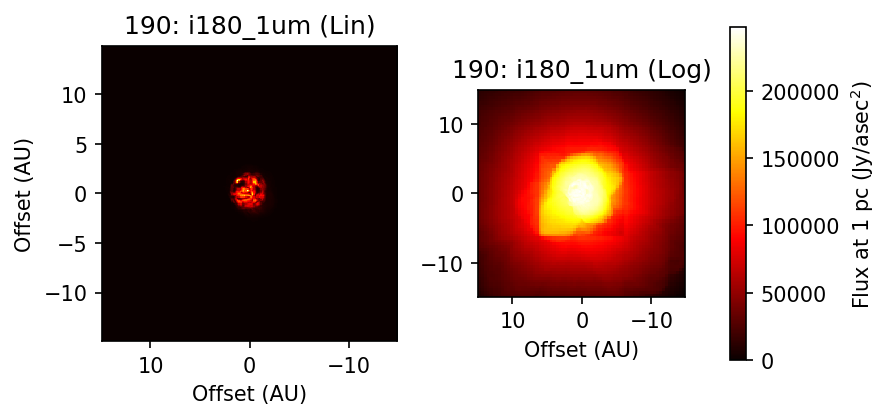

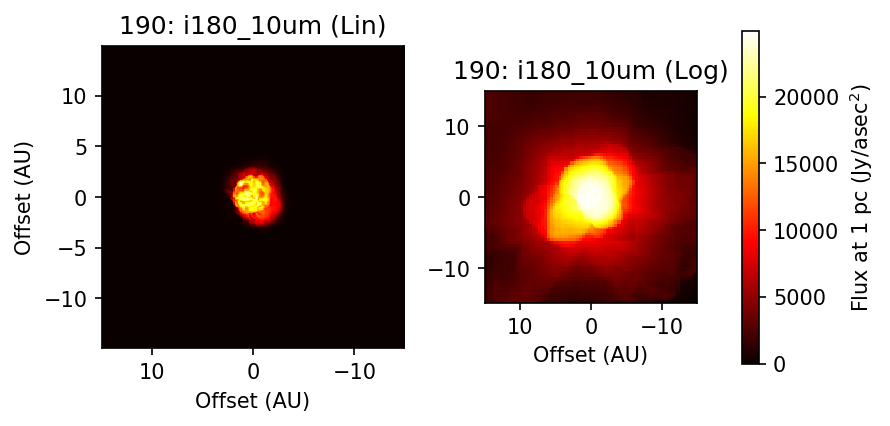

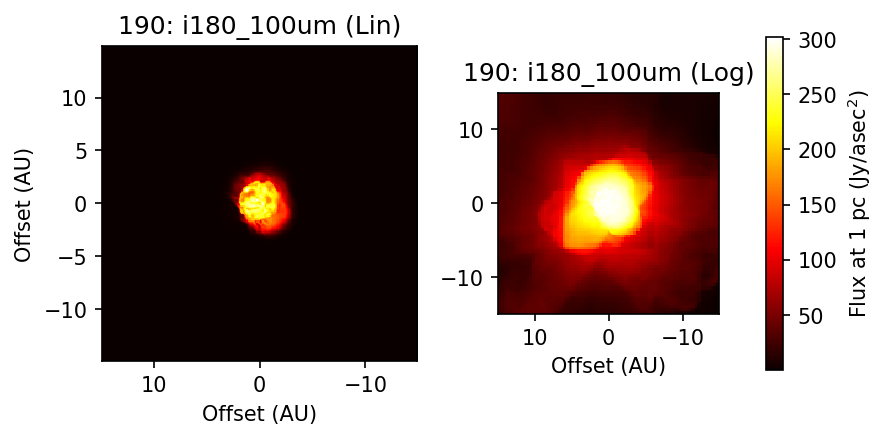

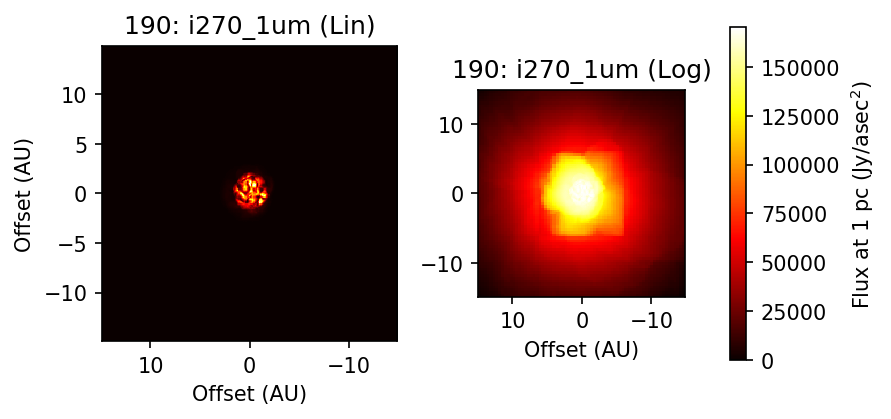

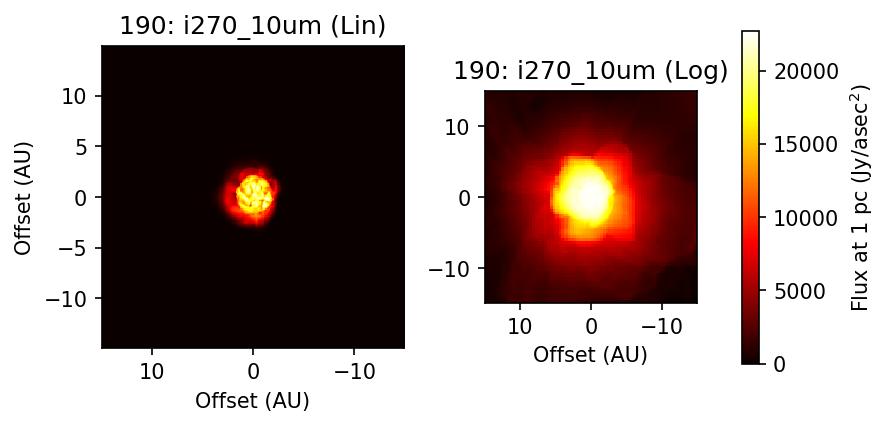

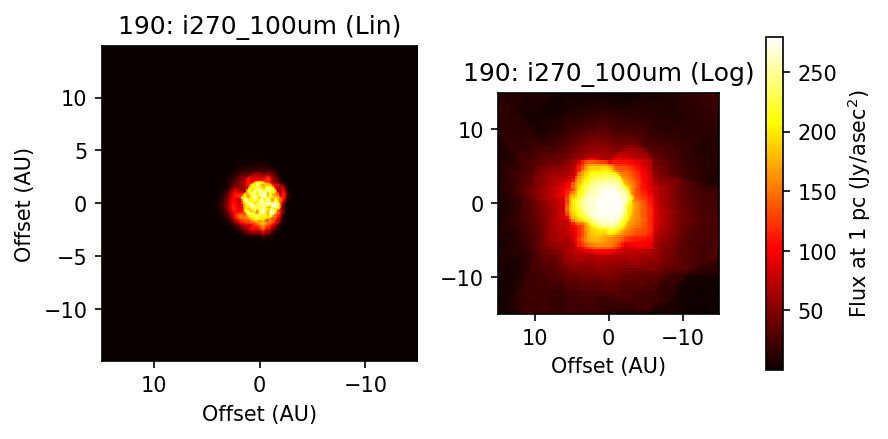

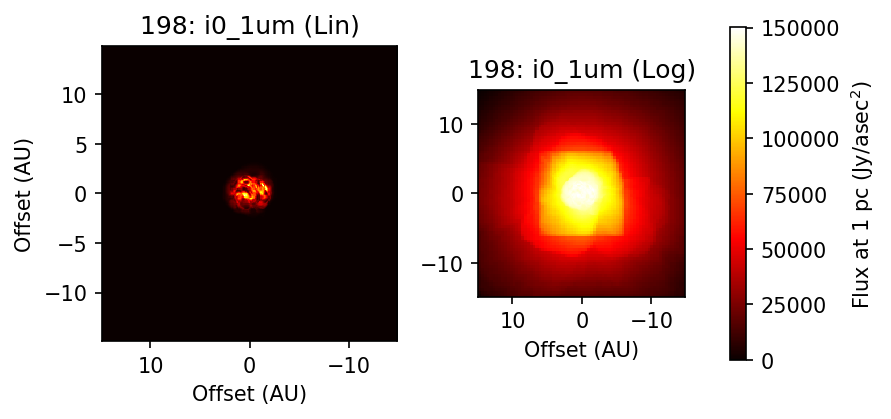

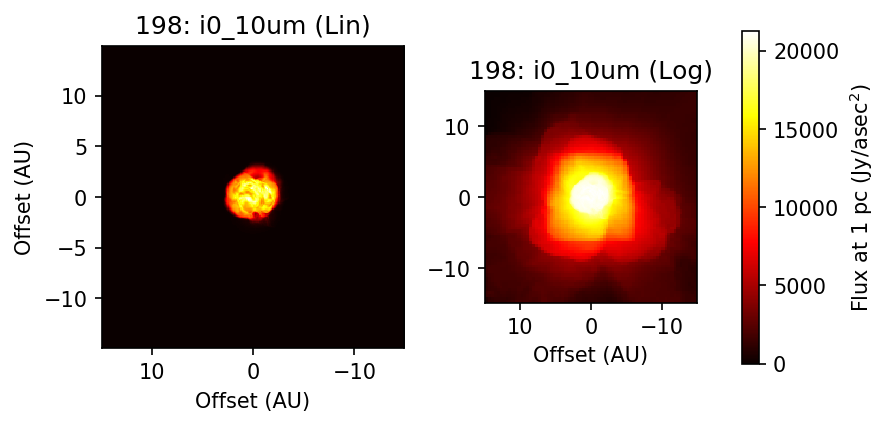

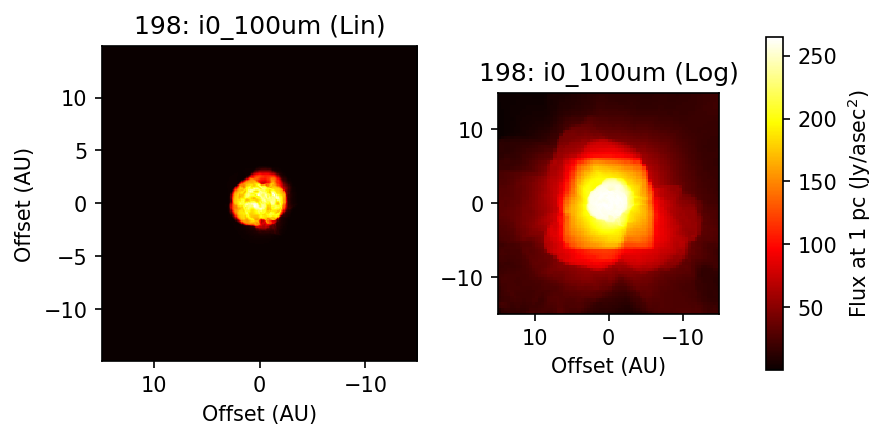

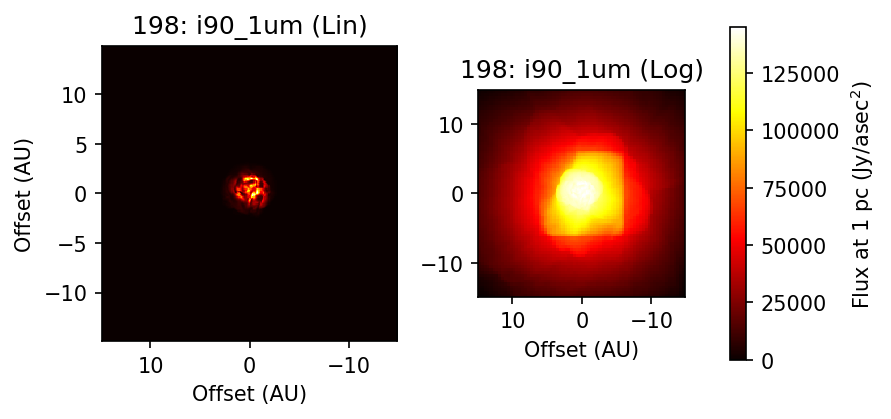

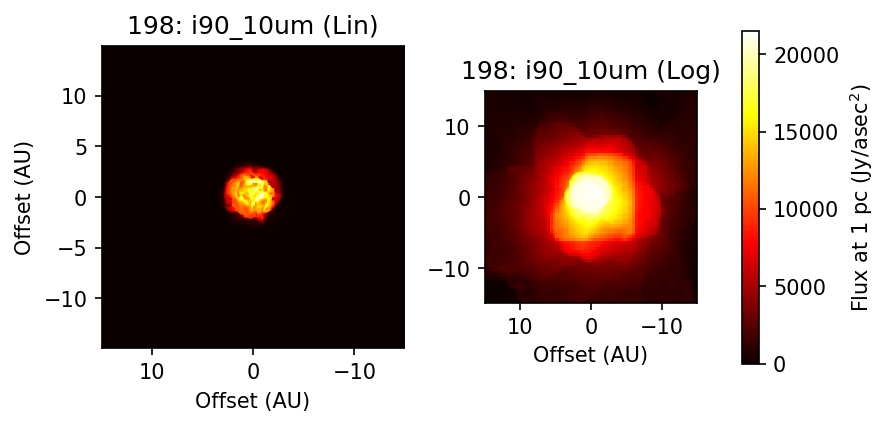

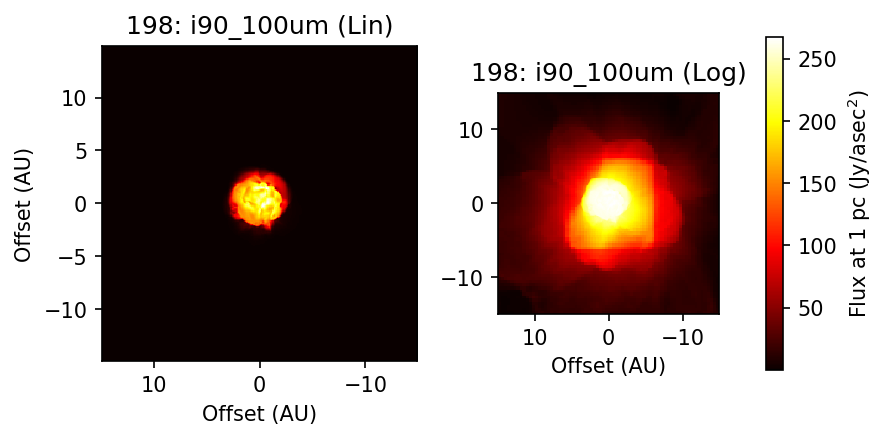

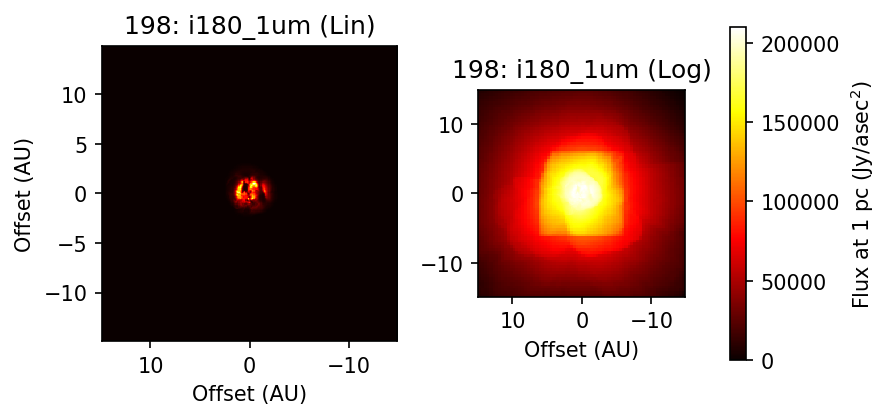

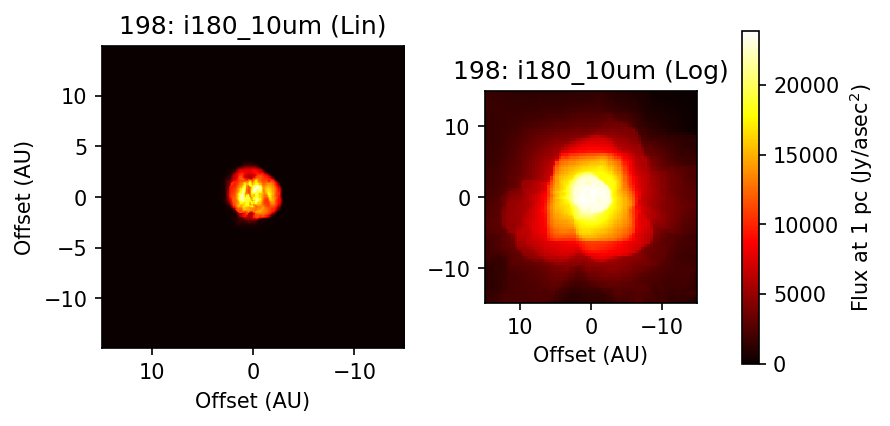

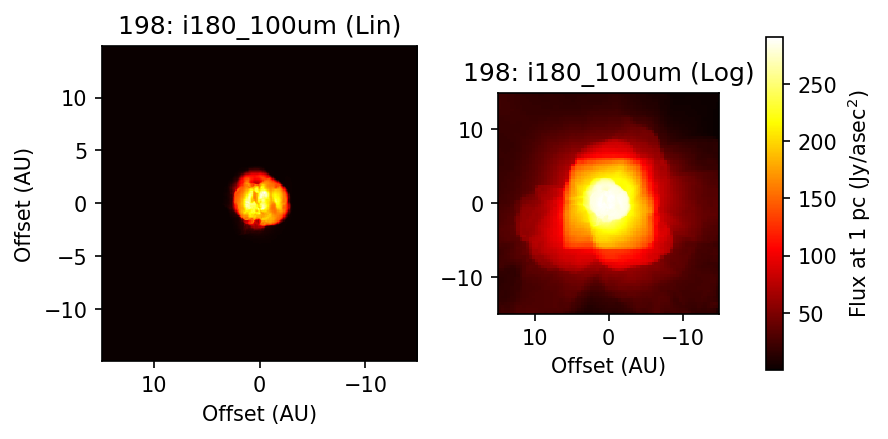

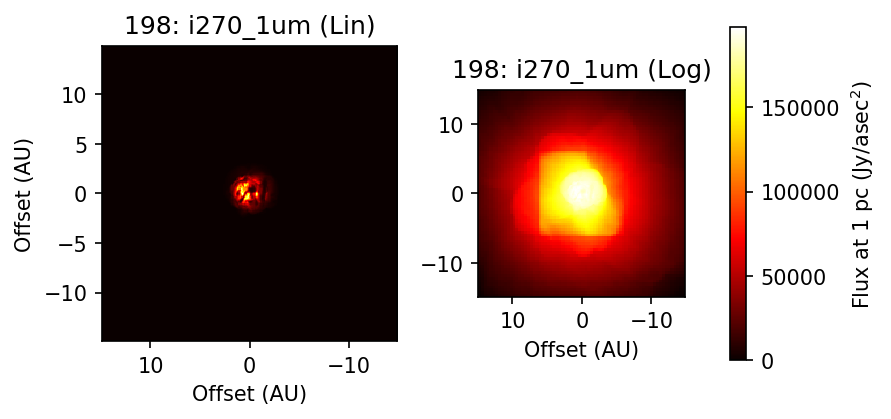

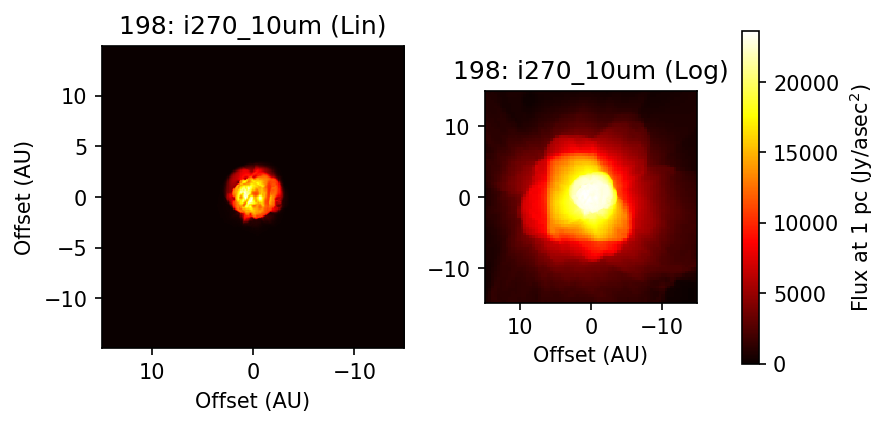

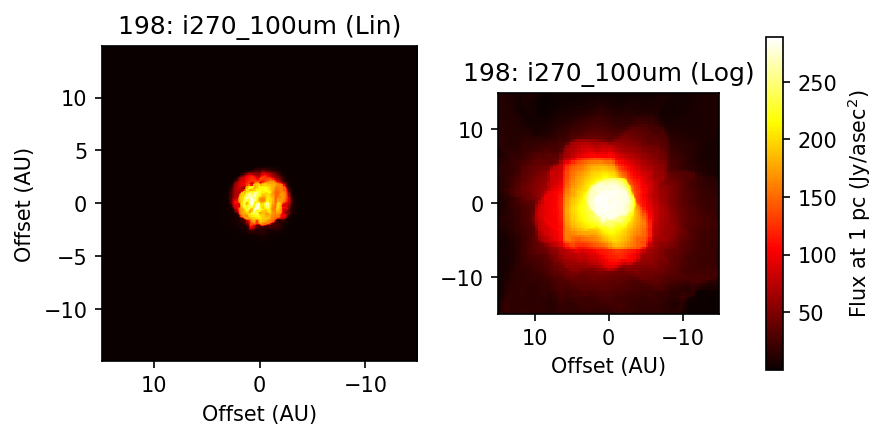

In [4]:
# Plot results

import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

path = '../r3dresults/st28gm06n052/'
phases = [186,190,198]
imagewaves = [1,10,100]
imageincls = [0,90,180,270]

# List of image file names:
# Yes, I could use list compr, but this is easier to read
images = []
for imageincl in imageincls:
    for imagewave in imagewaves:
        images.append(f'image_i{imageincl}_{imagewave}um.out')


for phase in phases:
    # Plot images
    testflux = a3d.plot_images(
        path = f'{path}{phase}/',
        images = images,
        distance = 1
    )
